In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **데이터 살펴보기**

In [2]:
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/predic_price/train.csv"
train = pd.read_csv(file_path)

In [3]:
train.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [4]:
train.shape

(1733, 44)

In [5]:
# 본 프로젝트에 사용되는 품목 : 배추, 무, 마늘, 양파, 대파, 건고추, 깻잎
train.columns

Index(['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [6]:
# 가격 텍스트가 있는 컬럼만 추출
price_columns = [col for col in train.columns if '가격' in col or 'date' in col]
price_columns

['date',
 '배추_가격(원/kg)',
 '무_가격(원/kg)',
 '양파_가격(원/kg)',
 '건고추_가격(원/kg)',
 '마늘_가격(원/kg)',
 '대파_가격(원/kg)',
 '얼갈이배추_가격(원/kg)',
 '양배추_가격(원/kg)',
 '깻잎_가격(원/kg)',
 '시금치_가격(원/kg)',
 '미나리_가격(원/kg)',
 '당근_가격(원/kg)',
 '파프리카_가격(원/kg)',
 '새송이_가격(원/kg)',
 '팽이버섯_가격(원/kg)',
 '토마토_가격(원/kg)',
 '청상추_가격(원/kg)',
 '백다다기_가격(원/kg)',
 '애호박_가격(원/kg)',
 '캠벨얼리_가격(원/kg)',
 '샤인마스캇_가격(원/kg)']

In [7]:
train = train[price_columns]
train.columns = train.columns.str.replace("_가격(원/kg)", "")
prd = ['date', '배추', '무', '마늘', '양파', '대파', '건고추', '깻잎']
train = train[prd]

In [8]:
train

,date,배추,무,마늘,양파,대파,건고추,깻잎
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0
...,...,...,...,...,...,...,...,...
1728,2020-09-24,1839.0,990.0,4775.0,990.0,2380.0,19101.0,10028.0
1729,2020-09-25,1789.0,1011.0,5039.0,955.0,2239.0,23095.0,10921.0
1730,2020-09-26,1760.0,1075.0,5565.0,961.0,2126.0,22510.0,10607.0
1731,2020-09-27,3066.0,1139.0,5227.0,1056.0,1866.0,22333.0,12195.0


In [9]:
train.shape

(1733, 8)

In [10]:
test = pd.read_csv("/content/drive/MyDrive/predic_price/test.csv")
test = test[price_columns]
test.columns = test.columns.str.replace("_가격(원/kg)", "")
test = test[prd]

In [11]:
test.head()

,date,배추,무,마늘,양파,대파,건고추,깻잎
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0


In [12]:
test.shape

(37, 8)

# **데이터 로드 및 전처리**

In [13]:
import pandas as pd
import numpy as np
import os

# 한글 -> 영어
kor_to_eng = {'date': 'date',
              '배추': 'cabbage',
              '무': 'radish',
              '마늘': 'garlic',
              '양파': 'onion',
              '대파': 'daikon',
              '건고추': 'cilantro',
              '깻잎': 'artichoke'}

def load_data(data_dir, phase, prd):
    """
    모델에 학습시킬 dataset 추출하기
    Args:
        data_dir (str) : csv 경고 지정
        phase (str) : 학습용 or 테스트용
        prd (list): 예측 대상 품목
    Returns:
        pd.DataFrame: 데이터셋
    """
    data_df = pd.read_csv(os.path.join(data_dir, phase + '.csv'))

    price_columns = [col for col in data_df.columns if '가격' in col or 'date' in col]
    df = data_df[price_columns] # 가격만 예측, 거래량은 예측에서 제외
    df.columns = df.columns.str.replace("_가격(원/kg)", "")
    df.columns = df.columns.map(kor_to_eng)
    df['date'] = pd.to_datetime(df['date'])

    df = df[prd]

    return df

In [14]:
data_dir = '/content/drive/MyDrive/predic_price'

# 예측 대상 품목
prd = ['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# 데이터셋 생성
train_data = load_data(data_dir, 'train', prd)
test_data = load_data(data_dir, 'test', prd)

if train_data is not None:
    print("Train data loaded successfully:")
    print(train_data.head())

if test_data is not None:
    print("Test data loaded successfully:")
    print(test_data.head())

Train data loaded successfully:
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
Test data loaded successfully:
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


<ipython-input-13-b2e40bdce8ca>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-13-b2e40bdce8ca>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [15]:
print(train_data.shape)
print(test_data.shape)

(1733, 8)
(37, 8)


# **EDA**
*  데이터셋 이해를 위한 분석
*  훈련 데이터와 Prophet의 요일/월 별 비교

In [16]:
train_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,1733,1733,1733,1733,1733,1733,1733
mean,597,490,3433,652,1160,9537,4614
std,410,299,1751,366,645,8757,2733
min,0,0,0,0,0,0,0
25%,335,324,2687,467,853,6015,3387
50%,577,453,3953,638,1188,8607,4492
75%,805,717,4758,925,1551,12500,5942
max,5000,1360,6415,2000,3182,170836,14326


In [17]:
print(train_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


In [18]:
test_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,37,37,37,37,37,37,37
mean,594,523,4131,843,1934,16237,4202
std,467,317,2209,452,994,9417,2381
min,0,0,0,0,0,0,0
25%,437,433,4881,966,2010,14654,3927
50%,521,549,5218,1068,2268,18353,5000
75%,636,652,5325,1109,2412,24013,5311
max,1787,1190,5762,1160,3784,25873,11298


In [19]:
print(test_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


In [20]:
# 품목간 상관관계
cor_matrix = test_data.corr()[1:].drop('date', axis=1)
cor_matrix.style.background_gradient(cmap='Blues').format('{:.2f}')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
cabbage,1.00,0.90,0.69,0.63,0.62,0.53,0.64
radish,0.90,1.00,0.72,0.66,0.85,0.58,0.76
garlic,0.69,0.72,1.00,0.98,0.78,0.91,0.80
onion,0.63,0.66,0.98,1.00,0.77,0.92,0.76
daikon,0.62,0.85,0.78,0.77,1.00,0.69,0.85
cilantro,0.53,0.58,0.91,0.92,0.69,1.00,0.79
artichoke,0.64,0.76,0.80,0.76,0.85,0.79,1.00


데이터의 요일/월 별 평균

In [21]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['day'] = train_data['date'].dt.day_of_week
train_data['month'] = train_data['date'].dt.month

# 예측 대상 품목
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# 요일별 평균 가격
price_by_day = train_data.groupby("day")[products].mean().round(2)

# 월별 평균 가격
price_by_month = train_data.groupby("month")[products].mean().round(2)

In [22]:
price_by_day

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
day,,,,,,,
0,683.44,561.35,3946.44,755.19,1365.35,10929.59,5291.88
1,672.60,568.67,4052.69,752.32,1360.32,10774.06,5313.30
2,686.67,561.73,4043.98,761.73,1330.97,10342.55,5284.68
3,671.24,575.26,3872.85,753.13,1336.74,11484.06,5259.10
4,668.19,563.08,4008.91,742.42,1311.27,10633.57,5291.32
5,699.12,558.24,4009.06,750.63,1321.08,12412.71,5324.81
6,99.55,47.78,107.33,55.50,102.17,203.03,541.68


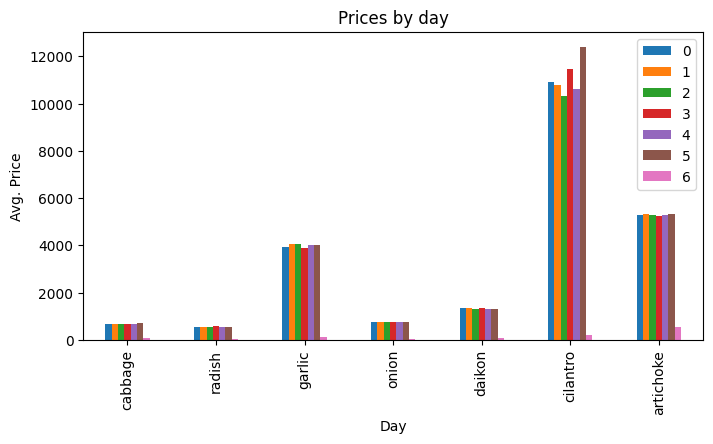

In [23]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 요일별 평균 가격 plt
price_by_day.T.plot(kind='bar', figsize=(8,4))

plt.title('Prices by day')
plt.xlabel('Day')
plt.ylabel('Avg. Price')
plt.legend()
plt.show()

In [24]:
price_by_month

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
month,,,,,,,
1,491.80,459.25,3517.42,746.19,1183.17,7872.32,6692.89
2,617.68,435.96,3550.97,818.74,1271.64,8268.52,4775.11
3,565.03,468.69,3491.91,804.06,1137.14,9508.95,4111.92
4,573.63,481.76,3423.37,703.65,879.39,8636.03,3959.53
5,461.96,476.36,2726.12,552.31,997.29,8415.70,3895.37
6,379.22,373.45,2642.50,498.67,980.92,8669.63,2666.47
7,539.54,385.53,3369.56,510.33,939.57,9109.62,3358.28
8,869.45,569.15,3773.91,622.59,1387.43,12754.94,5543.28
9,1071.39,658.76,3682.44,671.26,1562.33,11991.41,6284.26


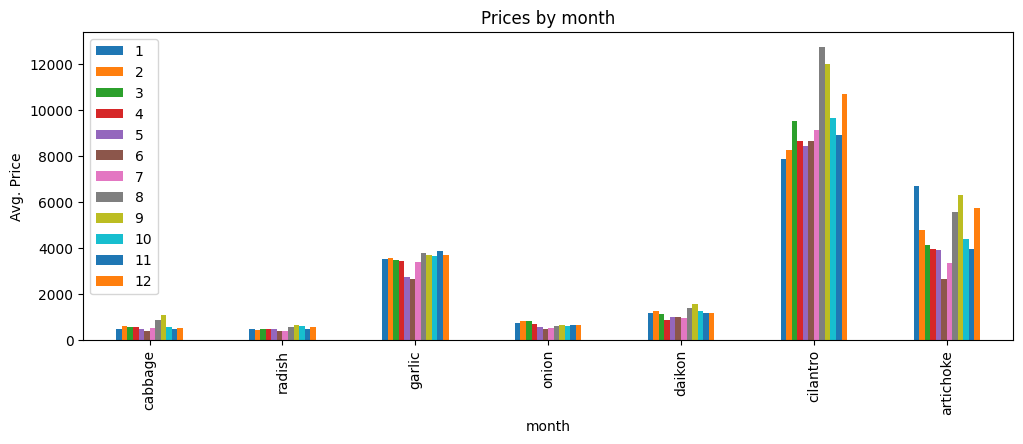

In [25]:
# 월별 평균 가격 plt
price_by_month.T.plot(kind='bar', figsize=(12,4))

plt.title('Prices by month')
plt.xlabel('month')
plt.ylabel('Avg. Price')
plt.legend()
plt.show()

Prophet

In [26]:
import logging
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)

In [27]:
# 예측 시작일, 마지막일 지정
start_dt = '2020-01-01'
end_dt = '2020-12-31'

In [28]:
def adjust_and_calculate_mean(forecast, period, time_unit):
    #음수 -> 양수로 조정, 그룹화 및 평균 계산
    min_value = forecast[period].min()
    forecast[period] += abs(min_value) + 1
    mean_values = forecast.groupby(time_unit)[period].mean().values
    return mean_values

def forecast_yearly_weekly(forecast, col, adjust = True):
    #forecast 불러오기
    forecast['month'] = forecast['ds'].dt.month
    forecast['dayofweek'] = forecast['ds'].dt.dayofweek

    # yearly, weekly 가격 조정
    yearly_flow[col] = adjust_and_calculate_mean(forecast, 'yearly', 'month')
    weekly_flow[col] = adjust_and_calculate_mean(forecast, 'weekly', 'dayofweek')
    return yearly_flow, weekly_flow

In [29]:
# 예측 결과를 저장할 데이터프레임 초기화
yearly_flow = pd.DataFrame()
weekly_flow = pd.DataFrame()

# 품목별 반복하면서 예측후 저장
for col in products:
    train_prophet = train_data[['date', col]].rename(columns={'date': 'ds', col: 'y'})

    model_prophet = Prophet(# trend
    changepoint_prior_scale=0.5,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False)
    model_prophet.add_country_holidays(country_name='KR')
    model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)

    model_prophet.fit(train_prophet)

    future_dates = pd.DataFrame(pd.date_range(start=start_dt, end=end_dt), columns=['ds'])
    forecast = model_prophet.predict(future_dates)
    forecast = forecast.round(2)

    yearly_flow, weekly_flow = forecast_yearly_weekly(forecast, col)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/tf2gn4e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/lroratd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54865', 'data', 'file=/tmp/tmpawgorltl/tf2gn4e_.json', 'init=/tmp/tmpawgorltl/lroratd8.json', 'output', 'file=/tmp/tmpawgorltl/prophet_modeld1gmwpn7/prophet_model-20240801021855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/pfml296l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/exwqbx7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [30]:
weekly_flow

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,582.11,522.50,3874.46,702.52,1278.06,10727.72,4778.39
1,583.28,526.24,3977.93,703.93,1269.61,10614.11,4832.44
2,593.66,522.08,3982.70,713.44,1244.57,10226.60,4805.30
3,575.29,527.72,3765.56,697.99,1236.30,11257.23,4717.07
4,581.31,523.15,3944.47,695.92,1229.42,10536.93,4789.21
5,609.40,515.18,3932.47,702.01,1231.70,12195.22,4824.10
6,1.00,1.00,1.00,1.00,1.00,1.00,1.00


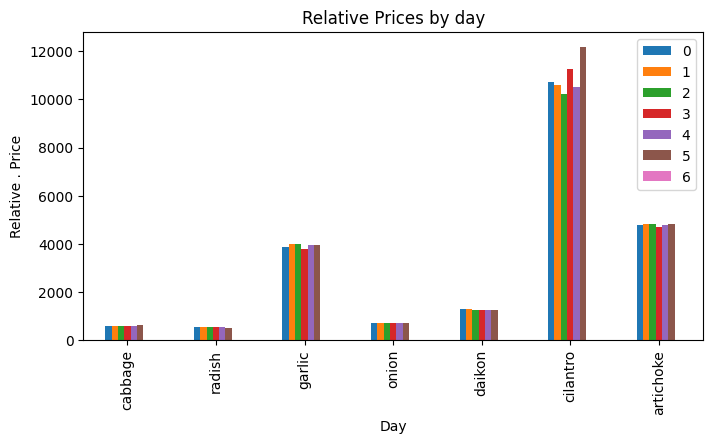

In [31]:
# 요일별 평균 가격 plt
weekly_flow.T.plot(kind='bar', figsize=(8,4))

plt.title('Relative Prices by day')
plt.xlabel('Day')
plt.ylabel('Relative . Price')
plt.legend()
plt.show()

In [32]:
yearly_flow

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,362.387742,429.755484,1737.026452,425.691613,448.463871,4334.730323,5178.312258
1,400.586207,301.274138,1573.978966,482.402414,378.938621,4046.464483,2987.338621
2,289.964516,197.633548,1284.846452,434.680968,153.711935,4613.126452,1825.215484
3,238.949667,148.414000,1166.482333,301.260000,39.156333,2401.090000,1647.956667
4,120.480968,121.743871,466.343226,88.200645,275.229032,1214.150323,1347.215161
5,24.627333,32.120000,489.787333,18.545333,331.381000,247.445667,188.077667
6,208.983226,91.991613,1369.141935,25.058065,364.886129,575.491290,1030.853548
7,626.938387,344.427419,1785.290968,133.860645,843.235484,3878.157097,3170.061935
8,950.553667,526.377333,2057.991000,239.845333,1093.914333,4311.320667,4388.749333
9,539.748387,512.776129,2126.433871,244.563548,755.057419,3294.273548,3050.324839


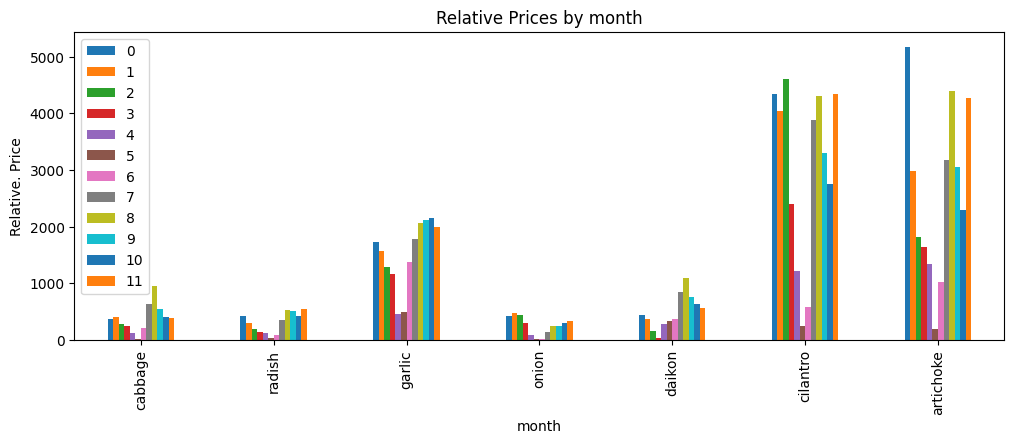

In [33]:
yearly_flow.T.plot(kind='bar', figsize=(12,4))

plt.title('Relative Prices by month')
plt.xlabel('month')
plt.ylabel('Relative. Price')
plt.legend()
plt.show()

# **모델** 구축

In [34]:
data_dir = '/content/drive/MyDrive/predic_price'

# 예측 대상 품목
prd = ['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# 데이터셋 생성
train_data = load_data(data_dir, 'train', prd)
test_data = load_data(data_dir, 'test', prd)

In [35]:
# 학습+테스트셋 합치기
data = pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)

(1770, 8)


In [36]:
import holidays

def add_data_features(data):
    """
    dataset 에 모델링용 피처를 생성
    args:
        dataset
    return:
        features 포함된 dataset
    """
    # feature engineering
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['day_of_week'] = data['date'].dt.dayofweek
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

    kr_holidays = holidays.KR(years=data['year'].unique())
    data['is_holiday'] = data['date'].isin(kr_holidays).astype(int)

    products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
    window_size = 7

    for product in products:
        # 가격 데이터를 7일 앞으로 이동시켜 7일 전 데이터를 사용하기 위해 shift(1)를 사용
        price_rolling = data[product].copy().shift(1)
        data[f'{product}_rolling_mean'] = price_rolling.rolling(window=window_size).mean()
        data[f'{product}_rolling_std'] = price_rolling.rolling(window=window_size).std()

        # Null 값을 0으로 변경
        data[f'{product}_rolling_mean'] = data[f'{product}_rolling_mean'].fillna(0)
        data[f'{product}_rolling_std'] = data[f'{product}_rolling_std'].fillna(0)

    data = data.fillna(0)

    return data

In [37]:
data = add_data_features(data)

In [82]:
def split_data(data, std_date='2020-09-29'):
    """
    특정 날짜 기준으로 train, test dataset 나누기
    args:
        std_data : 나누는 시점
    return:
        train, test dataset
    """
    train_data = data.query("date < @std_date")
    test_data = data.query("date >= @std_date")

    return train_data, test_data

In [83]:
train_data, test_data = split_data(data)
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (1733, 28)
Test set shape: (37, 28)


In [40]:
# Define the target
targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [41]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# 모델 선언: 지속적으로 추가 가능
models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
}

In [42]:
def get_target_features(target, weather_selection=None, prophet_selection=None):
    """
    사용될 features 설정
    args:
        weather_selection : weather 특징 사용 유무
        prophet_selection : prophet 특징 사용 유무
    return:
        features
    """
    features = ['year', 'month', 'day', 'day_of_week', 'is_weekend', 'is_holiday']
    each_features = ['rolling_mean', 'rolling_std']

    if weather_selection:
        features += ['STN_ID', 'WS_AVG', 'WR_DAY', 'WD_MAX', 'WD_INS', 'TA_AVG',
       'TD_AVG', 'TS_AVG', 'TG_MIN', 'HM_AVG', 'PV_AVG', 'EV_S_', 'EV_L_',
       'FG_DUR', 'PA_AVG', 'PS_AVG', 'CA_TOT', 'SS_DAY', 'SS_DUR', 'SS_CMB',
       'SI_DAY', 'RN_DAY', 'RN_D99', 'RN_DUR', 'TE_5', 'TE_10', 'TE_15',
       'TE_30', 'TE_50']

    if prophet_selection:
        each_features +=  ['trend', 'yearly', 'monthly', 'weekly', 'holidays']

    for feature in each_features:
        features += [f'{target}_{feature}']

    return features

In [43]:
def train_models(train_data, test_data, targets, models, weather_features=None, prophet_features=None):
    """
    models 내에 있는 모든 모델 학습
    """
    predictions = {model_name: {} for model_name in models}
    for model_name, model in models.items():
        for target in targets:
            target_features = get_target_features(target, weather_features, prophet_features)

            model.fit(train_data[target_features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[target_features])
    return predictions

In [44]:
predictions = train_models(train_data, test_data, targets, models)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 8
[LightGBM] [Info] Start training from score 597.120600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 8
[LightGBM] [Info] Start training from score 490.738604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

In [45]:
def create_predictions_df(test_data, predictions, targets):
    """
    test_data에 predictions 값 추가
    """
    test_data_predictions = test_data.copy()
    for model_name, model_preds in predictions.items():
        for target in targets:
            test_data_predictions[f'{target}_pred_{model_name}'] = model_preds[target]
    return test_data_predictions

In [46]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [47]:
test_data_predictions.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_pred_LGBM,cilantro_pred_LGBM,artichoke_pred_LGBM,cabbage_pred_XGBoost,radish_pred_XGBoost,garlic_pred_XGBoost,onion_pred_XGBoost,daikon_pred_XGBoost,cilantro_pred_XGBoost,artichoke_pred_XGBoost
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,2099.515455,22801.589272,10089.117165,1862.553955,1115.527710,4533.412109,929.057312,2287.160400,21199.972656,8182.495117
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,954.472229,17676.944690,5433.096341,1363.459595,146.411011,2023.742188,440.882446,618.104126,19868.185547,6602.486816
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,1132.417778,19665.682524,6099.066647,1649.435913,922.075134,3368.166016,895.227844,715.587769,24618.287109,6143.428711
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,1115.920251,24153.013159,4800.978012,1512.310913,707.623901,2294.936279,605.902893,1639.626465,28298.730469,7788.899414
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,1296.325663,15682.062083,5828.855383,1255.370483,665.516418,3615.504395,419.370667,1803.479126,22049.632812,7114.834961


In [48]:
def apply_post_processing(test_data, targets):

    holidays = ['2020-10-01', '2020-10-03']
    test_data['day'] = test_data['date'].dt.dayofweek
    test_data['holiday'] = test_data['date'].isin(holidays).astype(int)
    test_data['is_flag'] = np.where((test_data['day'] == 6) | (test_data['holiday'] == 1), 1, 0)

    for target in targets:
        for model_name in test_data.columns:
            if target+'_pred_' in model_name:
                test_data[model_name] = np.where(test_data['is_flag'] == 0, test_data[model_name], 0)

    return test_data

In [49]:
test_data_predictions_post = apply_post_processing(test_data_predictions, targets)

In [50]:
test_data_predictions_post.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,artichoke_pred_LGBM,cabbage_pred_XGBoost,radish_pred_XGBoost,garlic_pred_XGBoost,onion_pred_XGBoost,daikon_pred_XGBoost,cilantro_pred_XGBoost,artichoke_pred_XGBoost,holiday,is_flag
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,10089.117165,1862.553955,1115.527710,4533.412109,929.057312,2287.160400,21199.972656,8182.495117,0,0
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,5433.096341,1363.459595,146.411011,2023.742188,440.882446,618.104126,19868.185547,6602.486816,0,0
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4800.978012,1512.310913,707.623901,2294.936279,605.902893,1639.626465,28298.730469,7788.899414,0,0
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1


In [51]:
def evaluate_predictions(test_data_predictions, targets):
    MdAPE_df = pd.DataFrame()

    for target in targets:
        for model_name in test_data_predictions.columns:
            if target+'_pred_' in model_name:
                APE_col = f'{target}_APE_{model_name.split("_")[2]}'
                test_data_predictions[APE_col] = np.abs((test_data_predictions[target] - test_data_predictions[model_name]) / test_data_predictions[target])
                MdAPE = test_data_predictions[APE_col].median()
                MdAPE_df.loc[target, f'{model_name.split("_")[2]}'] = 1 - round(MdAPE, 6)

    # product 열 추가
    MdAPE_df['product'] = MdAPE_df.index

    return MdAPE_df

In [52]:
metrics_post = evaluate_predictions(test_data_predictions_post, targets)

In [53]:
metrics_post

,Ridge,RandomForest,LGBM,XGBoost,product
cabbage,0.765882,0.792489,0.853159,0.693859,cabbage
radish,0.815989,0.826645,0.862387,0.777273,radish
garlic,0.855431,0.943165,0.936197,0.947625,garlic
onion,0.877443,0.957088,0.951224,0.966774,onion
daikon,0.845289,0.922117,0.904810,0.904347,daikon
cilantro,0.752538,0.810033,0.835056,0.825184,cilantro
artichoke,0.869221,0.847868,0.909859,0.817302,artichoke


In [54]:
# Visualize predictions
def plot_predictions(test_data_predictions, targets):
    num_rows = 3
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    axes = axes.flatten()

    for i, target in enumerate(targets):
        ax = axes[i]
        ax.plot(test_data_predictions['date'], test_data_predictions[target], label='Actual')
        ax.plot(test_data_predictions['date'], test_data_predictions[f'{target}_pred_LGBM'], label='Predicted (LGBM)')
        ax.set_title(target)
        ax.legend()
        ax.tick_params(axis='x', labelsize=6)

    plt.tight_layout()
    plt.show()

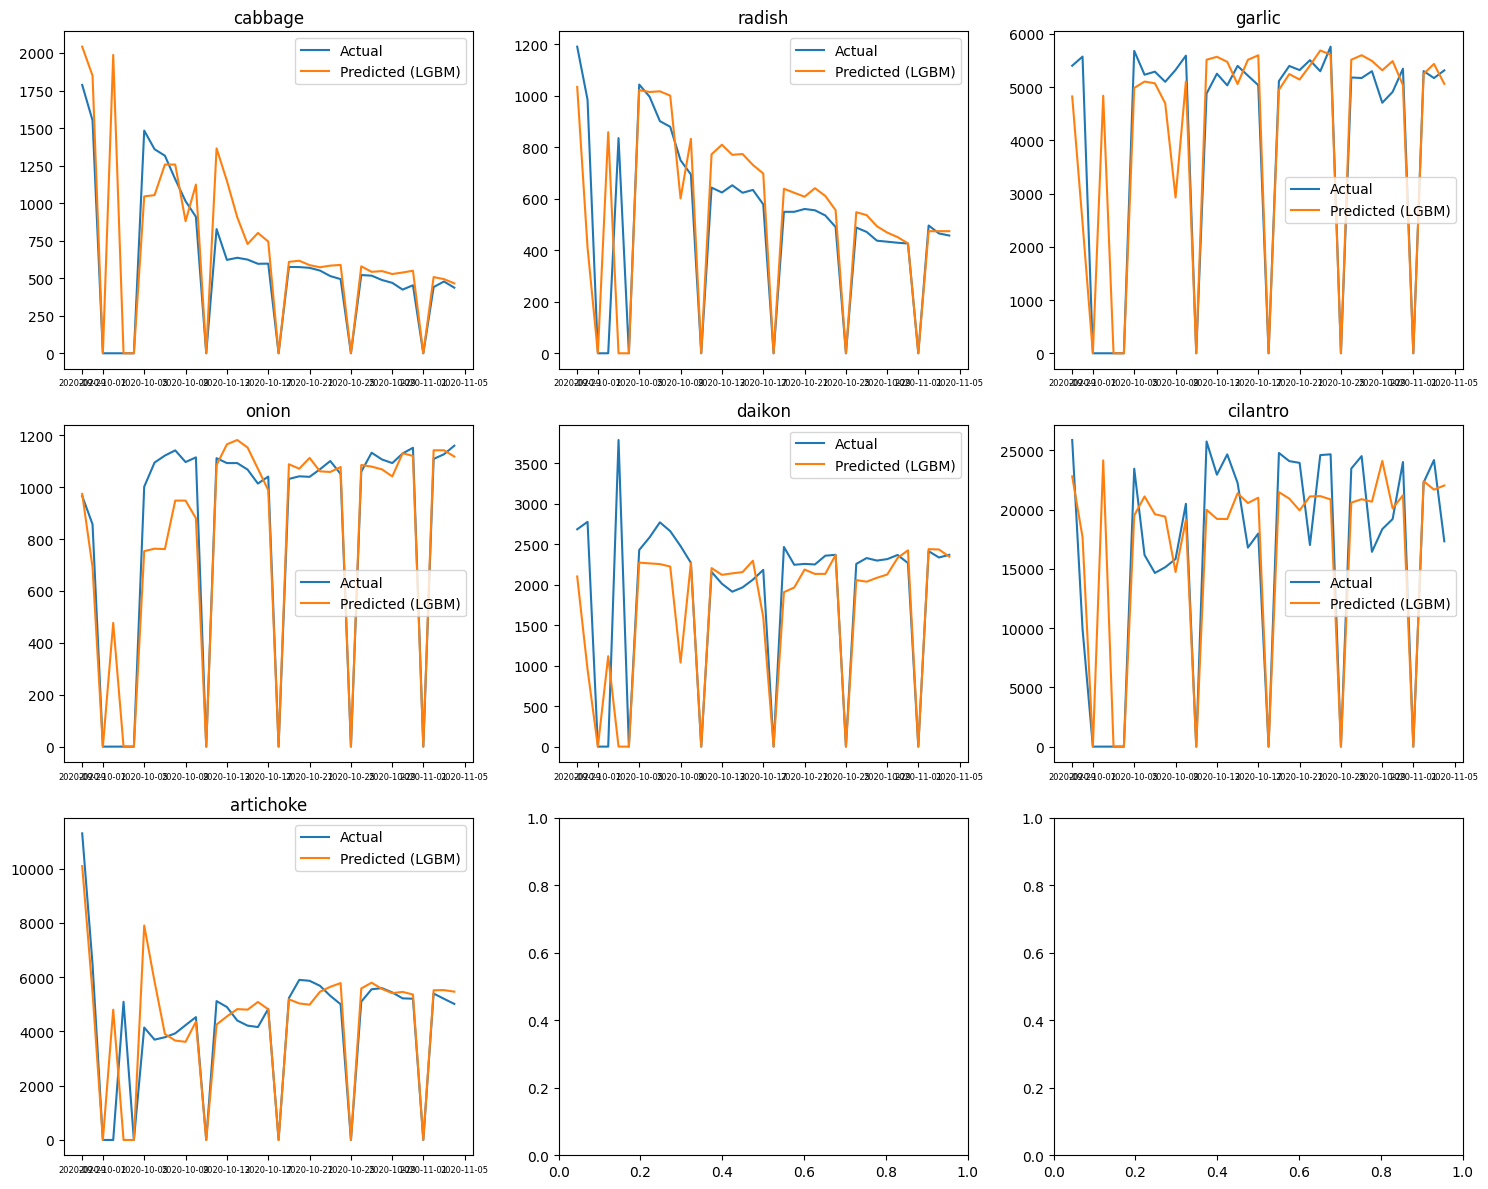

In [55]:
plot_predictions(test_data_predictions_post, targets)

Weather features 추가

기상청 API허브 : https://apihub.kma.go.kr/

지상 관측 데이터 이용
- 일기현상, 기온, 강수, 바람, 황사, 자외선 등의 데이터를 제공

In [56]:
import requests

In [57]:
def requests_response(url):
    # HTTP 요청 보내기
    response = requests.get(url)
    text = response.text

    return text

In [58]:
def add_weather_features(text):

    lines = text.strip().split('\n')
    data_rows = [line.split() for line in lines]
    data_rows =[[item for item in line.split() if item != '#']for line in lines]
    data = data_rows[2:-1]

    data[1] = data[1][:22] + [''] * (24 - 22) + data[1][22:]
    data[2] = [''] * 2 + data[2][:35] + [''] + data[2][35:]

    # 데이터를 DataFrame으로 변환, 첫 번째 줄을 컬럼으로 설정
    df = pd.DataFrame(data)

    head_df = df.iloc[:3, :].copy()
    df = df.iloc[2:, :].copy()

    new_columns = head_df.iloc[0] + "_" + head_df.iloc[1]

    df.columns = new_columns

    # Remove rows where any value in a row is "TM"
    columns_to_remove = [col for col in df.columns if 'TM' in df[col].values]
    df = df[1:]
    filtered_df = df.drop(columns=columns_to_remove)

    weather_df = pd.DataFrame(filtered_df, columns=filtered_df.columns)
    weather_df.rename(columns={weather_df.columns[0]: 'date'}, inplace=True)

    weather_df['date'] = weather_df['date'].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")
    weather_df['date'] = pd.to_datetime(weather_df['date'])

    return weather_df

In [69]:
# URL 설정
url = "https://apihub.kma.go.kr/api/typ01/url/kma_sfcdd3.php?tm1=20160101&tm2=20201104&stn=108&help=0&authKey=1wLYAOOWTFKC2ADjlnxSVg"

text = requests_response(url)
weather_features = add_weather_features(text)

In [70]:
weather_features.columns

Index(['date', 'STN_ID', 'WS_AVG', 'WR_DAY', 'WD_MAX', 'WD_INS', 'TA_AVG',
       'TD_AVG', 'TS_AVG', 'TG_MIN', 'HM_AVG', 'PV_AVG', 'EV_S_', 'EV_L_',
       'FG_DUR', 'PA_AVG', 'PS_AVG', 'CA_TOT', 'SS_DAY', 'SS_DUR', 'SS_CMB',
       'SI_DAY', 'RN_DAY', 'RN_D99', 'RN_DUR', 'TE_5', 'TE_10', 'TE_15',
       'TE_30', 'TE_50'],
      dtype='object')

In [71]:
print(weather_features.dtypes)

date      datetime64[ns]
STN_ID            object
WS_AVG            object
WR_DAY            object
WD_MAX            object
WD_INS            object
TA_AVG            object
TD_AVG            object
TS_AVG            object
TG_MIN            object
HM_AVG            object
PV_AVG            object
EV_S_             object
EV_L_             object
FG_DUR            object
PA_AVG            object
PS_AVG            object
CA_TOT            object
SS_DAY            object
SS_DUR            object
SS_CMB            object
SI_DAY            object
RN_DAY            object
RN_D99            object
RN_DUR            object
TE_5              object
TE_10             object
TE_15             object
TE_30             object
TE_50             object
dtype: object


In [72]:
from sklearn.preprocessing import LabelEncoder

def prepocess_data(df):
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    return df

In [74]:
weather_features = prepocess_data(weather_features)

In [76]:
print(weather_features.dtypes)

date      datetime64[ns]
STN_ID             int64
WS_AVG             int64
WR_DAY             int64
WD_MAX             int64
WD_INS             int64
TA_AVG             int64
TD_AVG             int64
TS_AVG             int64
TG_MIN             int64
HM_AVG             int64
PV_AVG             int64
EV_S_              int64
EV_L_              int64
FG_DUR             int64
PA_AVG             int64
PS_AVG             int64
CA_TOT             int64
SS_DAY             int64
SS_DUR             int64
SS_CMB             int64
SI_DAY             int64
RN_DAY             int64
RN_D99             int64
RN_DUR             int64
TE_5               int64
TE_10              int64
TE_15              int64
TE_30              int64
TE_50              int64
dtype: object


Prophet 모델에서 계산 된 yearly, monthly, weekly, holiday에 대한 features 추가

In [78]:
def add_prophet_features(data, prd, start_dt, end_dt):
    prophet_features = pd.DataFrame()
    # 품목별 반복하면서 예측후 저장
    for col in prd[1:]:
        train_prophet = train_data[['date', col]].rename(columns={'date': 'ds', col: 'y'})

        model_prophet = Prophet(# trend
        changepoint_prior_scale=0.5,
        # seasonality
        weekly_seasonality=10,
        yearly_seasonality=10,
        daily_seasonality=False)
        model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        # holiday
        model_prophet.add_country_holidays(country_name='KR')

        model_prophet.fit(train_prophet)

        future_dates = pd.DataFrame(pd.date_range(start=start_dt, end=end_dt), columns=['ds'])
        forecast = model_prophet.predict(future_dates)
        forecast = forecast.round(2)

        # Assign each component of the forecast to a separate column
        prophet_features[col + '_trend'] = forecast['trend']
        prophet_features[col + '_monthly'] = forecast['monthly']
        prophet_features[col + '_weekly'] = forecast['weekly']
        prophet_features[col + '_yearly'] = forecast['yearly']
        prophet_features[col + '_holidays'] = forecast['holidays']
    prophet_features['date'] = forecast['ds'] # Assuming you want the dates as well

    return prophet_features

전체 코드

In [85]:
def run_full_pipeline(data_dir, prd, models, targets, weather_selection=False, prophet_selection=False):

    train_data = load_data(data_dir, 'train', prd)
    test_data = load_data(data_dir, 'test', prd)

    data = pd.concat([train_data, test_data]).reset_index(drop=True)

    data = add_data_features(data)

    if weather_selection:
        url = "https://apihub.kma.go.kr/api/typ01/url/kma_sfcdd3.php?tm1=20160101&tm2=20201104&stn=108&help=0&authKey=1wLYAOOWTFKC2ADjlnxSVg"

        text = requests_response(url)
        weather_features = add_weather_features(text)

        data = pd.merge(data, weather_features, on=['date'], how='left')

    if prophet_selection:
        start_dt = '2016-01-01'
        end_dt = '2020-11-04'
        prophet_features = add_prophet_features(train_data, prd, start_dt, end_dt)
        data = pd.merge(data, prophet_features, on=['date'], how='left')

    data = prepocess_data(data)

    train_data, test_data = split_data(data)

    predictions = train_models(train_data, test_data, targets, models, weather_selection, prophet_selection)

    predictions_add = create_predictions_df(test_data, predictions, targets)

    predictions_post = apply_post_processing(predictions_add, targets)

    metrics_post = evaluate_predictions(predictions_post, targets)

    return metrics_post

In [80]:
data_dir = '/content/drive/MyDrive/predic_price'

prd = ['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor()
}

targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [86]:
metrics_post = run_full_pipeline(data_dir, prd, models, targets, weather_selection=False, prophet_selection=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 8
[LightGBM] [Info] Start training from score 597.120600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 8
[LightGBM] [Info] Start training from score 490.738604
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 1

In [87]:
metrics_post

,Ridge,RandomForest,LGBM,XGBoost,product
cabbage,0.765882,0.789337,0.853159,0.693859,cabbage
radish,0.815989,0.841348,0.862387,0.777273,radish
garlic,0.855431,0.947808,0.936197,0.947625,garlic
onion,0.877443,0.958349,0.951224,0.966774,onion
daikon,0.845289,0.928734,0.904810,0.904347,daikon
cilantro,0.752538,0.835598,0.835056,0.825184,cilantro
artichoke,0.869221,0.876375,0.909859,0.817302,artichoke


In [88]:
metrics_post_add_wt = run_full_pipeline(data_dir, prd, models, targets, weather_selection=True, prophet_selection=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4829
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 35
[LightGBM] [Info] Start training from score 597.120600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4829
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 35
[LightGBM] [Info] Start training from score 490.738604
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4829
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 35
[LightGBM] [Info] Start tr

In [89]:
metrics_post_add_wt.columns = ['Ridge_wt', 'RandomForest_wt', 'LGBM_wt', 'XGBoost_wt', 'product']

In [90]:
metrics_post_add_wt

,Ridge_wt,RandomForest_wt,LGBM_wt,XGBoost_wt,product
cabbage,0.733217,0.910289,0.880994,0.785297,cabbage
radish,0.820978,0.871707,0.896689,0.891851,radish
garlic,0.865278,0.940867,0.918058,0.954513,garlic
onion,0.887449,0.931839,0.953693,0.954513,onion
daikon,0.864575,0.896517,0.874119,0.881785,daikon
cilantro,0.735304,0.756824,0.804088,0.808419,cilantro
artichoke,0.859308,0.884239,0.903232,0.875546,artichoke


In [91]:
metrics_post_add_wt_ph = run_full_pipeline(data_dir, prd, models, targets, weather_selection=True, prophet_selection=True)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/7g26xo_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/oujdtbqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33263', 'data', 'file=/tmp/tmpawgorltl/7g26xo_i.json', 'init=/tmp/tmpawgorltl/oujdtbqc.json', 'output', 'file=/tmp/tmpawgorltl/prophet_model4jfiqpe6/prophet_model-20240801024410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:44:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/n9kajbwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpawgorltl/fc72zfn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5428
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 40
[LightGBM] [Info] Start training from score 597.120600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5429
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 40
[LightGBM] [Info] Start training from score 490.738604
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5428
[LightGBM] [Info] Number of data points in the train set: 1733, number of used features: 40
[LightGBM] [Info] Start tr

In [92]:
metrics_post_add_wt_ph.columns = ['Ridge_wt_ph', 'RandomForest_wt_ph', 'LGBM_wt_ph', 'XGBoost_wt_ph', 'product']

In [93]:
metrics_post_add_wt_ph

,Ridge_wt_ph,RandomForest_wt_ph,LGBM_wt_ph,XGBoost_wt_ph,product
cabbage,0.399699,0.851810,0.769512,0.715804,cabbage
radish,0.744181,0.908047,0.835815,0.854727,radish
garlic,0.963560,0.940271,0.933573,0.942548,garlic
onion,0.961552,0.925984,0.965652,0.973736,onion
daikon,0.858545,0.898807,0.879792,0.855254,daikon
cilantro,0.844874,0.830419,0.839033,0.746249,cilantro
artichoke,0.773544,0.879236,0.915132,0.762772,artichoke


전체 성능 평가

In [94]:
metric_all = pd.merge(pd.merge(metrics_post, metrics_post_add_wt, on='product', how='left'), metrics_post_add_wt_ph, on='product', how='left')

In [95]:
metric_all

,Ridge,RandomForest,LGBM,XGBoost,product,Ridge_wt,RandomForest_wt,LGBM_wt,XGBoost_wt,Ridge_wt_ph,RandomForest_wt_ph,LGBM_wt_ph,XGBoost_wt_ph
0,0.765882,0.789337,0.853159,0.693859,cabbage,0.733217,0.910289,0.880994,0.785297,0.399699,0.851810,0.769512,0.715804
1,0.815989,0.841348,0.862387,0.777273,radish,0.820978,0.871707,0.896689,0.891851,0.744181,0.908047,0.835815,0.854727
2,0.855431,0.947808,0.936197,0.947625,garlic,0.865278,0.940867,0.918058,0.954513,0.963560,0.940271,0.933573,0.942548
3,0.877443,0.958349,0.951224,0.966774,onion,0.887449,0.931839,0.953693,0.954513,0.961552,0.925984,0.965652,0.973736
4,0.845289,0.928734,0.904810,0.904347,daikon,0.864575,0.896517,0.874119,0.881785,0.858545,0.898807,0.879792,0.855254
5,0.752538,0.835598,0.835056,0.825184,cilantro,0.735304,0.756824,0.804088,0.808419,0.844874,0.830419,0.839033,0.746249
6,0.869221,0.876375,0.909859,0.817302,artichoke,0.859308,0.884239,0.903232,0.875546,0.773544,0.879236,0.915132,0.762772


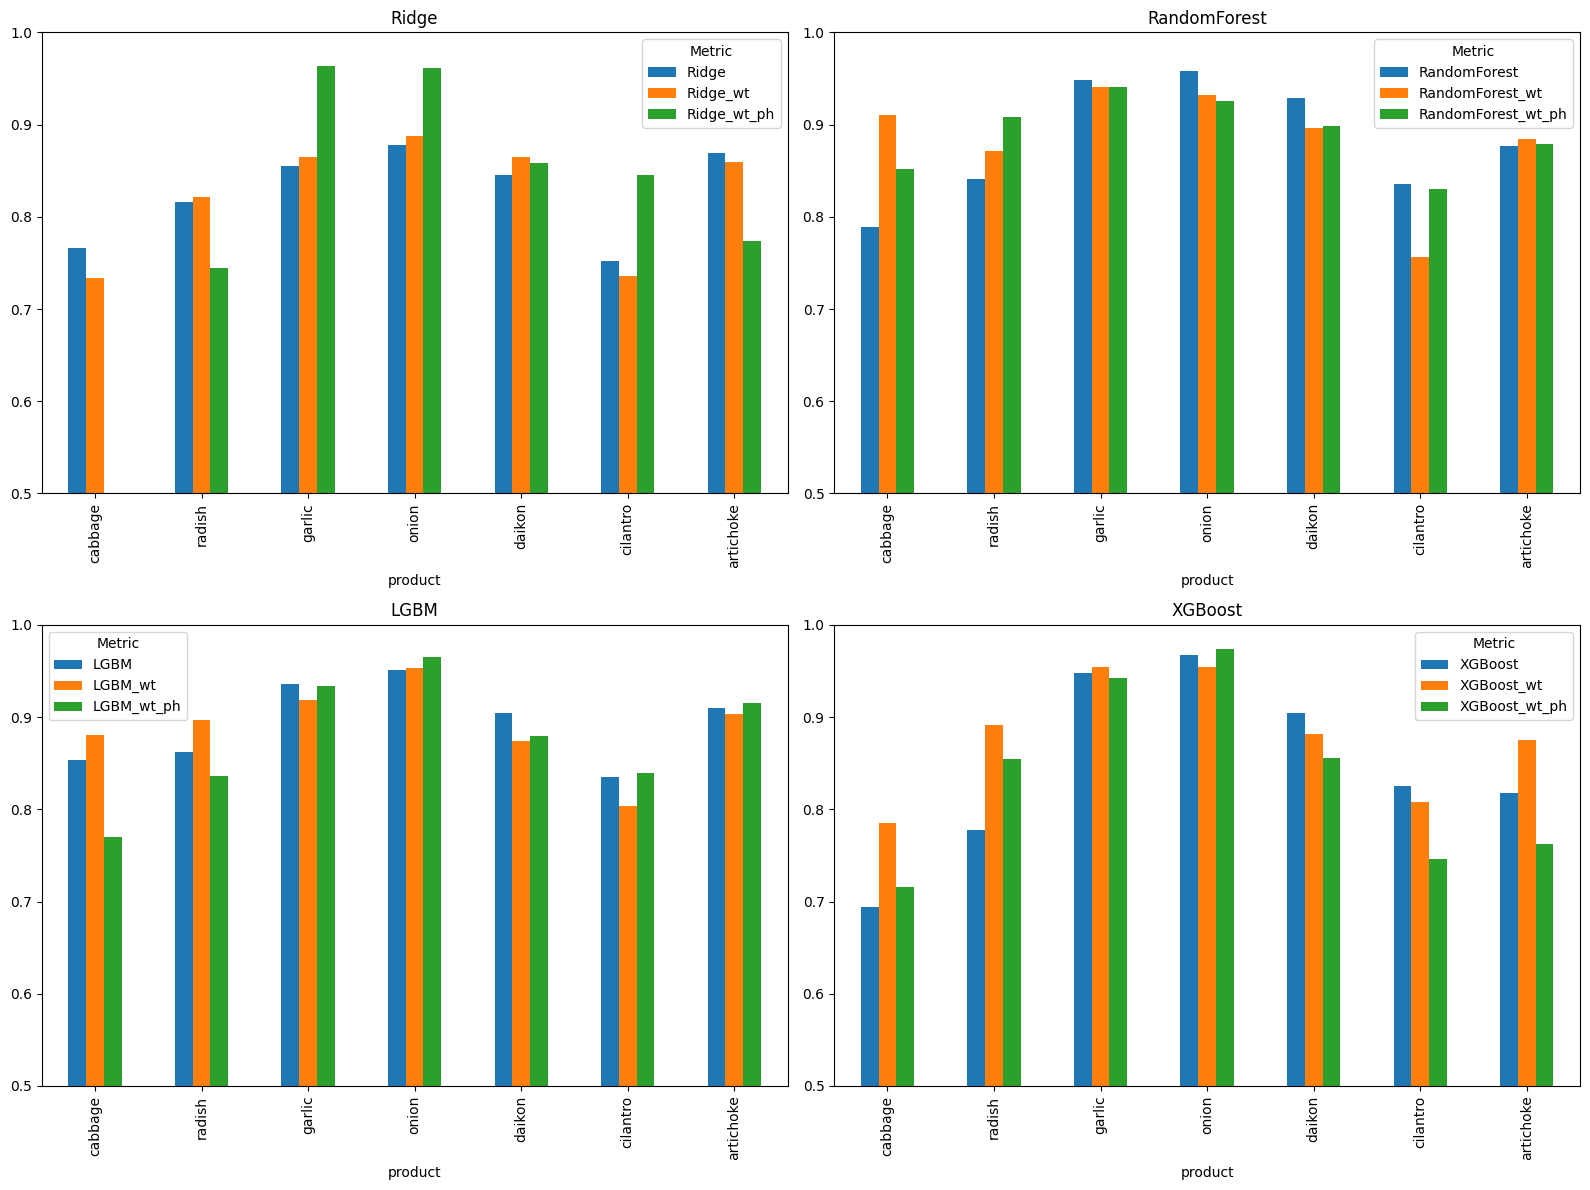

In [96]:
# 그래프 그리기
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.flatten()

models = ['Ridge', 'RandomForest', 'LGBM', 'XGBoost']
for ax, model in zip(axes, models):
    y = [model, f'{model}_wt', f'{model}_wt_ph']
    metric_all.plot(kind='bar', x='product', y=y, ax=ax)
    ax.set_ylim(0.5, 1.0)
    ax.set_title(model)
    ax.legend(title='Metric')

plt.tight_layout()
plt.show()